# CSV to DataFrame

In [167]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [106]:
df1994 = pd.read_csv('./data/seoul 1994-01-01 to 1996-01-01.csv')
df1996 = pd.read_csv('./data/seoul 1996-01-01 to 1998-01-01.csv')[1:]
df1998 = pd.read_csv('./data/seoul 1998-01-01 to 2000-01-01.csv')[1:]
df2000 = pd.read_csv('./data/seoul 2000-01-01 to 2002-01-01.csv')[1:]
df2002 = pd.read_csv('./data/seoul 2002-01-01 to 2004-01-01.csv')[1:]
df2004 = pd.read_csv('./data/seoul 2004-01-01 to 2006-01-01.csv')[1:]
df2006 = pd.read_csv('./data/seoul 2006-01-01 to 2008-01-01.csv')[1:]
df2008 = pd.read_csv('./data/seoul 2008-01-01 to 2010-01-01.csv')[1:]
df2010 = pd.read_csv('./data/seoul 2010-01-01 to 2012-01-01.csv')[1:]
df2012 = pd.read_csv('./data/seoul 2012-01-01 to 2014-01-01.csv')[1:]
df2014 = pd.read_csv('./data/seoul 2014-01-01 to 2016-01-01.csv')[1:]
df2016 = pd.read_csv('./data/seoul 2016-01-01 to 2018-01-01.csv')[1:]
df2018 = pd.read_csv('./data/seoul 2018-01-01 to 2020-01-01.csv')[1:]
df2020 = pd.read_csv('./data/seoul 2020-01-01 to 2022-01-01.csv')[1:]
df2022 = pd.read_csv('./data/seoul 2022-01-01 to 2024-01-01.csv')[1:]
df = pd.concat([df1994, df1996, df1998, df2000, df2002, df2004, df2006, df2008, df2010, df2012, df2014, df2016, df2018, df2020, df2022])

df.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,seoul,1994-01-01,35.2,16.4,26.3,33.4,13.0,24.3,15.5,65.9,...,NaN,NaN,NaN,1994-01-01T07:46:54,1994-01-01T17:23:56,0.61,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"47111099999,47112099999,47120099999,4711009999..."
1,seoul,1994-01-02,43.0,31.5,36.2,39.4,26.7,32.6,27.9,72.1,...,NaN,NaN,NaN,1994-01-02T07:47:03,1994-01-02T17:24:44,0.65,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"47111099999,47112099999,47120099999,4711009999..."
2,seoul,1994-01-03,47.9,30.9,38.0,44.7,24.5,35.4,27.3,68.1,...,NaN,NaN,NaN,1994-01-03T07:47:11,1994-01-03T17:25:33,0.68,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"47111099999,47112099999,47120099999,4711009999..."
3,seoul,1994-01-04,38.8,22.1,30.1,32.0,18.4,26.3,13.6,51.2,...,NaN,NaN,NaN,1994-01-04T07:47:16,1994-01-04T17:26:23,0.72,Clear,Clear conditions throughout the day.,clear-day,"47111099999,47112099999,47120099999,4711009999..."
4,seoul,1994-01-05,40.0,24.0,33.1,40.0,18.5,31.0,21.7,63.9,...,NaN,NaN,NaN,1994-01-05T07:47:19,1994-01-05T17:27:14,0.75,"Snow, Rain, Overcast",Cloudy skies throughout the day with late afte...,rain,"47111099999,47112099999,47120099999,4711009999..."


> 각 파일별로 yyyy-01-01 일자가 중복된다. 이에 첫번째 데이터는 슬라이싱 처리한다.

In [107]:
df.tail()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
726,seoul,2023-12-28,4.1,-1.7,1.1,2.4,-3.4,0.0,-3.7,71.5,...,9.6,5.0,10.0,2023-12-28T07:45:50,2023-12-28T17:20:48,0.54,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"47111099999,47098099999,47112099999,4711909999..."
727,seoul,2023-12-29,4.5,-1.4,1.5,3.0,-3.5,-0.1,-3.3,70.2,...,8.8,4.0,10.0,2023-12-29T07:46:08,2023-12-29T17:21:29,0.57,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"47111099999,47098099999,47112099999,4711909999..."
728,seoul,2023-12-30,1.9,-0.9,0.5,-1.2,-3.5,-2.4,-1.0,90.1,...,1.8,1.0,10.0,2023-12-30T07:46:24,2023-12-30T17:22:12,0.60,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with rain or ...,snow,"47111099999,47098099999,47112099999,4711909999..."
729,seoul,2023-12-31,4.4,0.8,2.3,3.1,-1.8,0.4,1.5,94.7,...,4.5,4.0,10.0,2023-12-31T07:46:38,2023-12-31T17:22:57,0.63,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"47111099999,47098099999,47112099999,4711909999..."
730,seoul,2024-01-01,7.3,-0.2,3.0,6.6,-2.8,1.7,0.5,84.7,...,8.6,5.0,10.0,2024-01-01T07:46:50,2024-01-01T17:23:42,0.66,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"47111099999,47098099999,47112099999,4711909999..."


In [108]:
import dateutil.parser as dp

# 실제 1994-01-01 ~ 2024-01-01 까지의 일수 계산
first_day = dp.parse('1994-01-01')
last_day = dp.parse('2024-01-02')

diff_days = last_day - first_day

# 데이터셋의 개수와 일수 비교 확인
df['datetime'].count(), diff_days

(10958, datetime.timedelta(days=10958))

**diff_days**

Date 계산시 day1 - day2를 하는 경우 day2의 하루전 까지의 기간을 계산 합니다.
 
따라서 day2를 2024-01-02로 지정 합니다.

# 결측치 분석

In [109]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_data_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

missing_data_summary.round(2)

,Missing Values,Percentage
name,0,0.00
datetime,0,0.00
tempmax,0,0.00
tempmin,0,0.00
temp,0,0.00
feelslikemax,0,0.00
feelslikemin,0,0.00
feelslike,0,0.00
dew,0,0.00
humidity,0,0.00


In [110]:
# 화씨를 섭씨로 변환하는 함수
#     Args:
#     temp_fahrenheit (float): 화씨 온도
#     Returns:
#     float: 섭씨 온도
def fahrenheit_to_celsius(temp_fahrenheit):
    return (temp_fahrenheit - 32) * 5.0 / 9.0

In [111]:
# 1994-01-01 ~ 2019-12-31 까지는 화씨 데이터
# 2020-01-01 ~ 2024-01-01 까지는 이미 섭씨 데이터 확인

before_2022 = df[df['datetime'] <= '2022-01-01'].copy()
after_2022 = df[df['datetime'] > '2022-01-01'].copy()

before_2022['temp_celsius'] =  before_2022['temp'].apply(fahrenheit_to_celsius).round(1)
before_2022['tempmax_celsius'] = before_2022['tempmax'].apply(fahrenheit_to_celsius).round(1)
before_2022['tempmin_celsius'] = before_2022['tempmin'].apply(fahrenheit_to_celsius).round(1)
# before_2022.head()

after_2022['temp_celsius'] = after_2022['temp']
after_2022['tempmax_celsius'] = after_2022['tempmax']
after_2022['tempmin_celsius'] = after_2022['tempmin']
# after_2022.head()
df = pd.concat([before_2022, after_2022])
df.to_csv('./data/seoul summary.csv', index=False)
df.head()


,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,sunrise,sunset,moonphase,conditions,description,icon,stations,temp_celsius,tempmax_celsius,tempmin_celsius
0,seoul,1994-01-01,35.2,16.4,26.3,33.4,13.0,24.3,15.5,65.9,...,1994-01-01T07:46:54,1994-01-01T17:23:56,0.61,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"47111099999,47112099999,47120099999,4711009999...",-3.2,1.8,-8.7
1,seoul,1994-01-02,43.0,31.5,36.2,39.4,26.7,32.6,27.9,72.1,...,1994-01-02T07:47:03,1994-01-02T17:24:44,0.65,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"47111099999,47112099999,47120099999,4711009999...",2.3,6.1,-0.3
2,seoul,1994-01-03,47.9,30.9,38.0,44.7,24.5,35.4,27.3,68.1,...,1994-01-03T07:47:11,1994-01-03T17:25:33,0.68,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"47111099999,47112099999,47120099999,4711009999...",3.3,8.8,-0.6
3,seoul,1994-01-04,38.8,22.1,30.1,32.0,18.4,26.3,13.6,51.2,...,1994-01-04T07:47:16,1994-01-04T17:26:23,0.72,Clear,Clear conditions throughout the day.,clear-day,"47111099999,47112099999,47120099999,4711009999...",-1.1,3.8,-5.5
4,seoul,1994-01-05,40.0,24.0,33.1,40.0,18.5,31.0,21.7,63.9,...,1994-01-05T07:47:19,1994-01-05T17:27:14,0.75,"Snow, Rain, Overcast",Cloudy skies throughout the day with late afte...,rain,"47111099999,47112099999,47120099999,4711009999...",0.6,4.4,-4.4


In [7]:
df[df['datetime'] >= '2021-12-31'].head(20)

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,sunrise,sunset,moonphase,conditions,description,icon,stations,temp_celsius,tempmax_celsius,tempmin_celsius
730,seoul,2021-12-31,24.9,16.4,20.5,16.6,6.4,10.9,-2.8,35.5,...,2021-12-31T07:46:43,2021-12-31T17:23:18,0.91,Clear,Clear conditions throughout the day.,clear-day,"47098099999,47112099999,47119099999,4712704321...",-6.4,-3.9,-8.7
731,seoul,2022-01-01,35.6,13.7,23.5,32.5,4.9,20.1,4.6,44.3,...,2022-01-01T07:46:54,2022-01-01T17:24:04,0.94,Clear,Clear conditions throughout the day.,clear-day,"47098099999,47112099999,47119099999,4712209999...",-4.7,2.0,-10.2
1,seoul,2022-01-02,2.6,-4.4,-1.1,-0.5,-8.6,-4.0,-8.4,58.9,...,2022-01-02T07:47:03,2022-01-02T17:24:52,0.98,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with morning ...,rain,"47111099999,47098099999,47112099999,4711909999...",-1.1,2.6,-4.4
2,seoul,2022-01-03,2.2,-7.7,-2.4,0.6,-11.5,-4.7,-10.1,56.4,...,2022-01-03T07:47:10,2022-01-03T17:25:41,0.00,"Snow, Rain, Partially cloudy",Becoming cloudy in the afternoon with late aft...,rain,"47111099999,47098099999,47112099999,4711909999...",-2.4,2.2,-7.7
3,seoul,2022-01-04,1.0,-5.0,-1.9,0.6,-9.1,-4.7,-10.6,54.8,...,2022-01-04T07:47:15,2022-01-04T17:26:32,0.04,Snow,Clear conditions throughout the day with late ...,rain,"47111099999,47098099999,47112099999,4711909999...",-1.9,1.0,-5.0
4,seoul,2022-01-05,1.7,-7.7,-3.1,1.7,-12.0,-4.9,-13.0,46.7,...,2022-01-05T07:47:18,2022-01-05T17:27:23,0.08,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"47111099999,47098099999,47112099999,4711909999...",-3.1,1.7,-7.7
5,seoul,2022-01-06,3.1,-6.0,-1.9,1.6,-10.0,-4.7,-12.1,47.3,...,2022-01-06T07:47:19,2022-01-06T17:28:16,0.11,Clear,Clear conditions throughout the day.,clear-day,"47111099999,47098099999,47112099999,4711909999...",-1.9,3.1,-6.0
6,seoul,2022-01-07,4.5,-5.9,-1.7,2.4,-8.4,-3.0,-12.1,47.4,...,2022-01-07T07:47:18,2022-01-07T17:29:11,0.14,Clear,Clear conditions throughout the day.,clear-day,"47111099999,47098099999,47112099999,4711909999...",-1.7,4.5,-5.9
7,seoul,2022-01-08,3.7,-5.0,-0.2,3.5,-8.6,-1.9,-6.6,62.6,...,2022-01-08T07:47:15,2022-01-08T17:30:06,0.18,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"47111099999,47098099999,47112099999,4711909999...",-0.2,3.7,-5.0
8,seoul,2022-01-09,5.5,-0.9,1.7,4.3,-3.1,0.5,-3.0,72.5,...,2022-01-09T07:47:10,2022-01-09T17:31:02,0.21,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"47111099999,47098099999,47112099999,4711909999...",1.7,5.5,-0.9


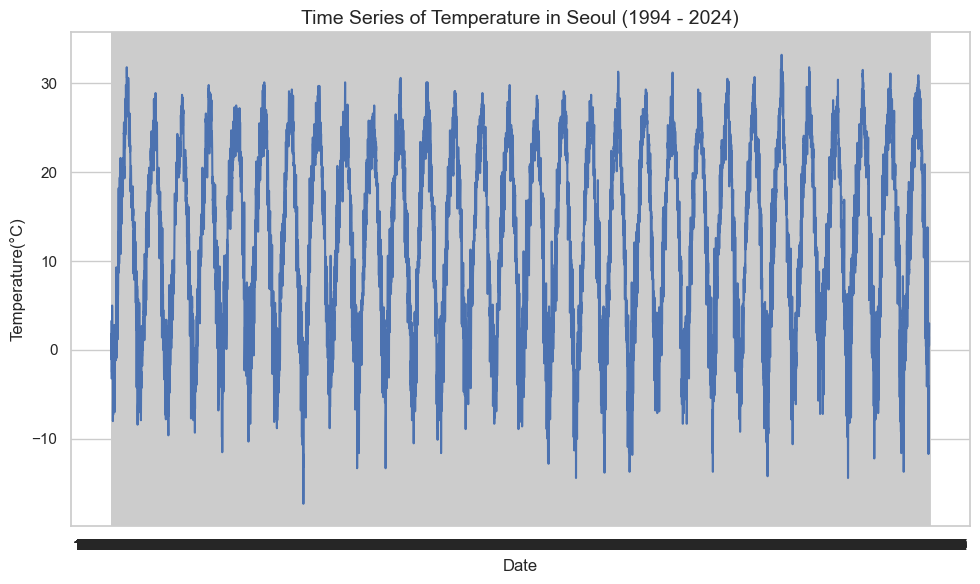

In [10]:
datetime_with_celsius = df[['datetime', 'temp_celsius']]

# seaborn style 세팅
sns.set_theme(style="whitegrid")

# lineplot 생성
plt.figure(figsize=(10, 6))
sns.lineplot(x='datetime', y='temp_celsius', data=datetime_with_celsius)

# 타이틀, 라벨 세팅
plt.title('Time Series of Temperature in Seoul (1994 - 2024)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Temperature(°C)', fontsize=12)

# 결과 확인 및 저장
plt.tight_layout()
# plt.show()
plt.savefig('./figures/seoul_temperature_1994-2024.png')


In [8]:
df[df['tempmin_celsius'] == df['tempmin_celsius'].min()][['datetime','temp_celsius','tempmin_celsius','tempmax_celsius']]


,datetime,temp_celsius,tempmin_celsius,tempmax_celsius
380,2001-01-15,-17.3,-22.5,-13.3


In [9]:
df[df['tempmax_celsius'] == df['tempmax_celsius'].max()][['datetime','temp_celsius','tempmin_celsius','tempmax_celsius']]

,datetime,temp_celsius,tempmin_celsius,tempmax_celsius
212,2018-08-01,32.8,26.9,39.1


# 봄, 여름, 가을, 겨울 구분 함수 만들기
---
- 봄: 일평균기온이 5℃ 이상 올라간 후 다시 떨어지지 않는 첫날 부터
- 여름: 일평균기온이 20℃ 이상 올라간 후 다시 떨어지지 않는 첫날 부터
- 가을: 일평균기온이 20℃ 미만으로 떨어진 후 다시 올라가지 않는 첫날 부터
- 겨울: 일평균기온이 5℃ 미만으로 떨어진 후 다시 올라가지 않는 첫날 부터

출처: https://kscc.re.kr/2020kscc/papers/Oral/A-03.pdf

In [190]:
def determine_season(temperatures):
    seasons = []
    current_season = 'Winter'
    seasons.append(current_season)  # 첫 번째 날짜는 Winter로 시작
    
    for i in range(1, len(temperatures)):
        future_temps = temperatures[i:i+14]  # 현재 일자 기준으로 2주간의 온도 데이터를 확인
        
        if current_season == 'Winter':
            # 2주간의 온도가 쭉 5도 이상이라면 Spring으로 전환
            if len(future_temps) == 14 and all(temp >= 5 for temp in future_temps):
                current_season = 'Spring'
        
        elif current_season == 'Spring':
            # 2주간의 온도가 쭉 20도 이상이라면 Summer로 전환
            if len(future_temps) == 14 and all(temp >= 20 for temp in future_temps):
                current_season = 'Summer'
        
        elif current_season == 'Summer':
            # 2주간의 온도가 쭉 20도 미만으로 떨어지면 Fall로 전환
            if len(future_temps) == 14 and all(temp < 20 for temp in future_temps):
                current_season = 'Fall'
        
        elif current_season == 'Fall':
            # 2주간의 온도가 쭉 5도 미만으로 떨어지면 Winter로 전환
            if len(future_temps) == 14 and all(temp < 5 for temp in future_temps):
                current_season = 'Winter'
        
        seasons.append(current_season)
    
    return seasons

In [193]:
df['seasons'] = determine_season(df['temp_celsius'].tolist())
df.to_csv('./data/seoul summary.csv', index=False)


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10958 entries, 0 to 730
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              10958 non-null  object 
 1   datetime          10958 non-null  object 
 2   tempmax           10958 non-null  float64
 3   tempmin           10958 non-null  float64
 4   temp              10958 non-null  float64
 5   feelslikemax      10958 non-null  float64
 6   feelslikemin      10958 non-null  float64
 7   feelslike         10958 non-null  float64
 8   dew               10958 non-null  float64
 9   humidity          10958 non-null  float64
 10  precip            10958 non-null  float64
 11  precipprob        10958 non-null  int64  
 12  precipcover       10958 non-null  float64
 13  preciptype        4045 non-null   object 
 14  snow              8035 non-null   float64
 15  snowdepth         8242 non-null   float64
 16  windgust          3642 non-null   float64
 17  

# 연도별 계절 카운팅

In [194]:
# 새로운 DF 선언
year_season_count = pd.DataFrame()

# datetime을 date type으로 변경 후 year 추출
year_season_count['year'] = pd.to_datetime(df['datetime']).dt.year
year_season_count['season'] = df['seasons']

# 년도별로 계절을 카운트
year_season_count.groupby(['year', 'season']).size().unstack(fill_value=0).reindex(columns=['Spring', 'Summer', 'Fall', 'Winter'])

season,Spring,Summer,Fall,Winter
year,,,,
1994,67,110,95,93
1995,78,97,59,131
1996,53,123,60,130
1997,66,99,110,90
1998,77,127,52,109
1999,79,106,71,109
2000,78,116,83,89
2001,62,120,74,109
2002,110,92,46,117


<Figure size 1200x800 with 0 Axes>

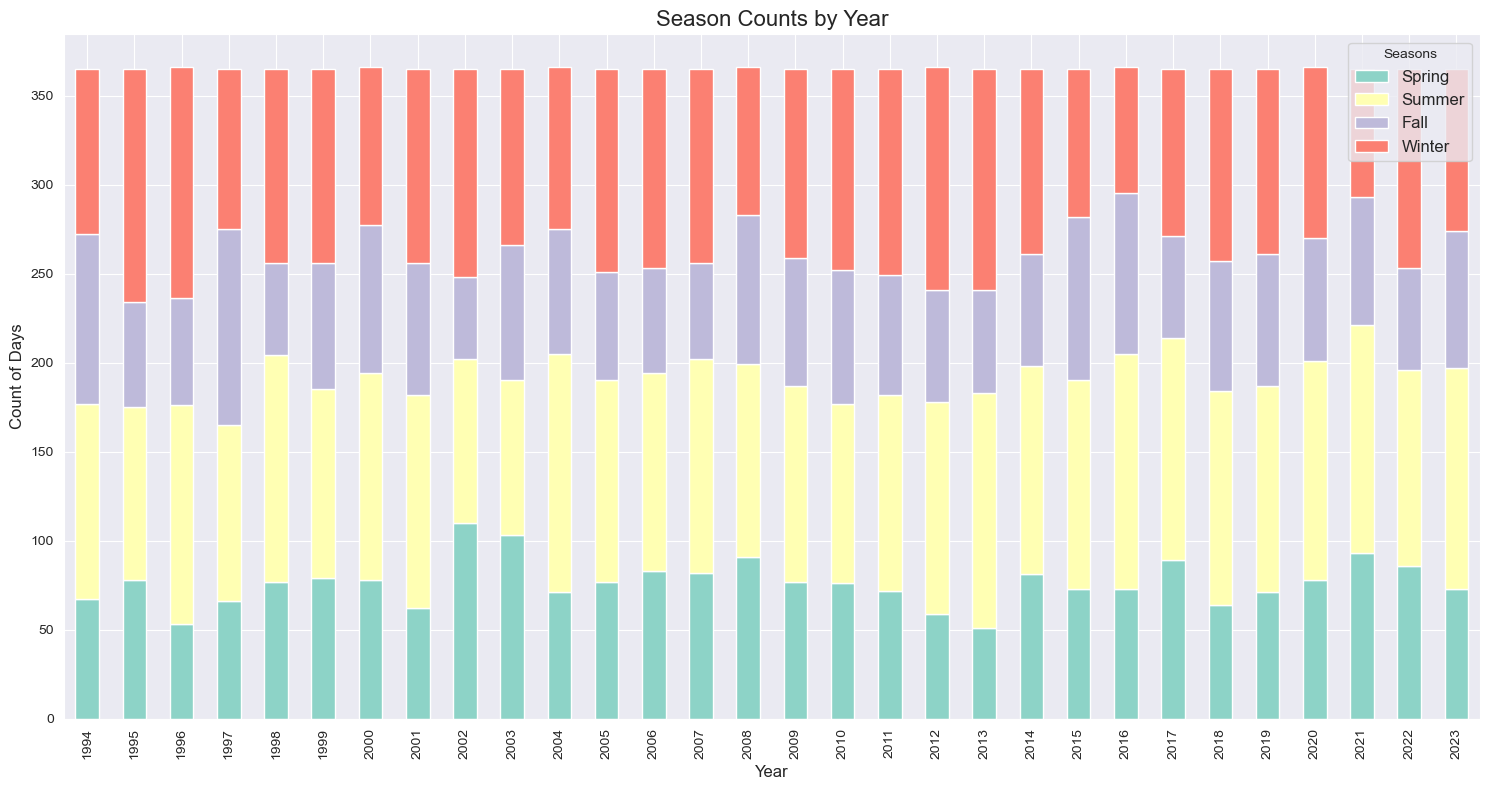

In [195]:
# 데이터 준비
year_season_count_plot = (
    year_season_count[:len(year_season_count)-1]
    .groupby(['year', 'season'])
    .size()
    .unstack(fill_value=0)
).reindex(columns=['Spring', 'Summer', 'Fall', 'Winter'])

# 그래프 크기 설정
plt.figure(figsize=(12, 8))

# 막대 그래프 생성 (stacked bar chart)
year_season_count_plot.plot(kind='bar', stacked=True, figsize=(15, 8), color=sns.color_palette("Set3"))

# 그래프 제목과 축 레이블 설정
plt.title('Season Counts by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count of Days', fontsize=12)

# 범례 설정
plt.legend(title='Seasons', fontsize=12)

# 그래프 출력
plt.tight_layout()
# plt.show()
plt.savefig('./figures/seoul_year_season_count.png')

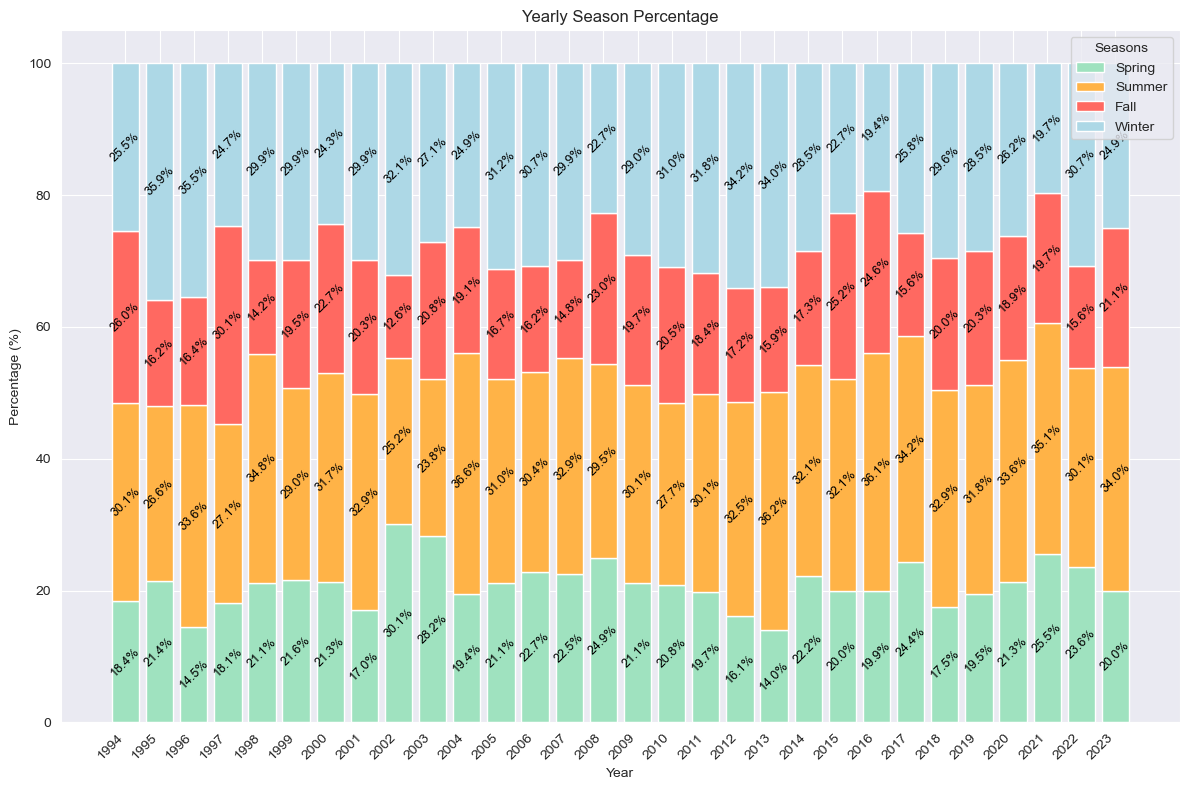

In [204]:
# 계절 순서 설정
season_order = ['Spring', 'Summer', 'Fall', 'Winter']

# 각 연도에 대해 계절의 일수 퍼센트 계산
year_season_percentage = (year_season_count[:len(year_season_count)-1]
                          .groupby(['year', 'season'])
                          .size()
                          .unstack(fill_value=0))
year_season_percentage = (year_season_percentage
                          .div(year_season_percentage.sum(axis=1), axis=0) * 100)

# 계절 순서 재정렬
year_season_percentage = year_season_percentage[season_order]

# 막대그래프 그리기 (stacked bar plot)
fig, ax = plt.subplots(figsize=(12, 8))

# 각 계절별로 누적 막대그래프 그리기
bottom = None
colors = {'Spring': '#9FE2BF', 'Summer': '#FFB347', 'Fall': '#FF6961', 'Winter': '#ADD8E6'}

for season in season_order:
    # 누적 막대그래프
    bars = ax.bar(year_season_percentage.index, year_season_percentage[season], bottom=bottom, color=colors[season], label=season)
    
    # 각 막대 위에 퍼센트 표시
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2, 
            bar.get_y() + height / 2, 
            f'{height:.1f}%', 
            ha='center', va='center', fontsize=9, color='black', rotation=45
        )
    
    if bottom is None:
        bottom = year_season_percentage[season]
    else:
        bottom += year_season_percentage[season]

# x축, y축 설정 및 제목
ax.set_xlabel('Year')
ax.set_ylabel('Percentage (%)')
ax.set_title('Yearly Season Percentage')
ax.legend(title="Seasons")

# 모든 연도를 x축에 표시
ax.set_xticks(year_season_percentage.index)
ax.set_xticklabels(year_season_percentage.index, rotation=45, ha='right')

plt.tight_layout()
plt.savefig('./figures/seoul_year_season_percentage.png')
# plt.show()

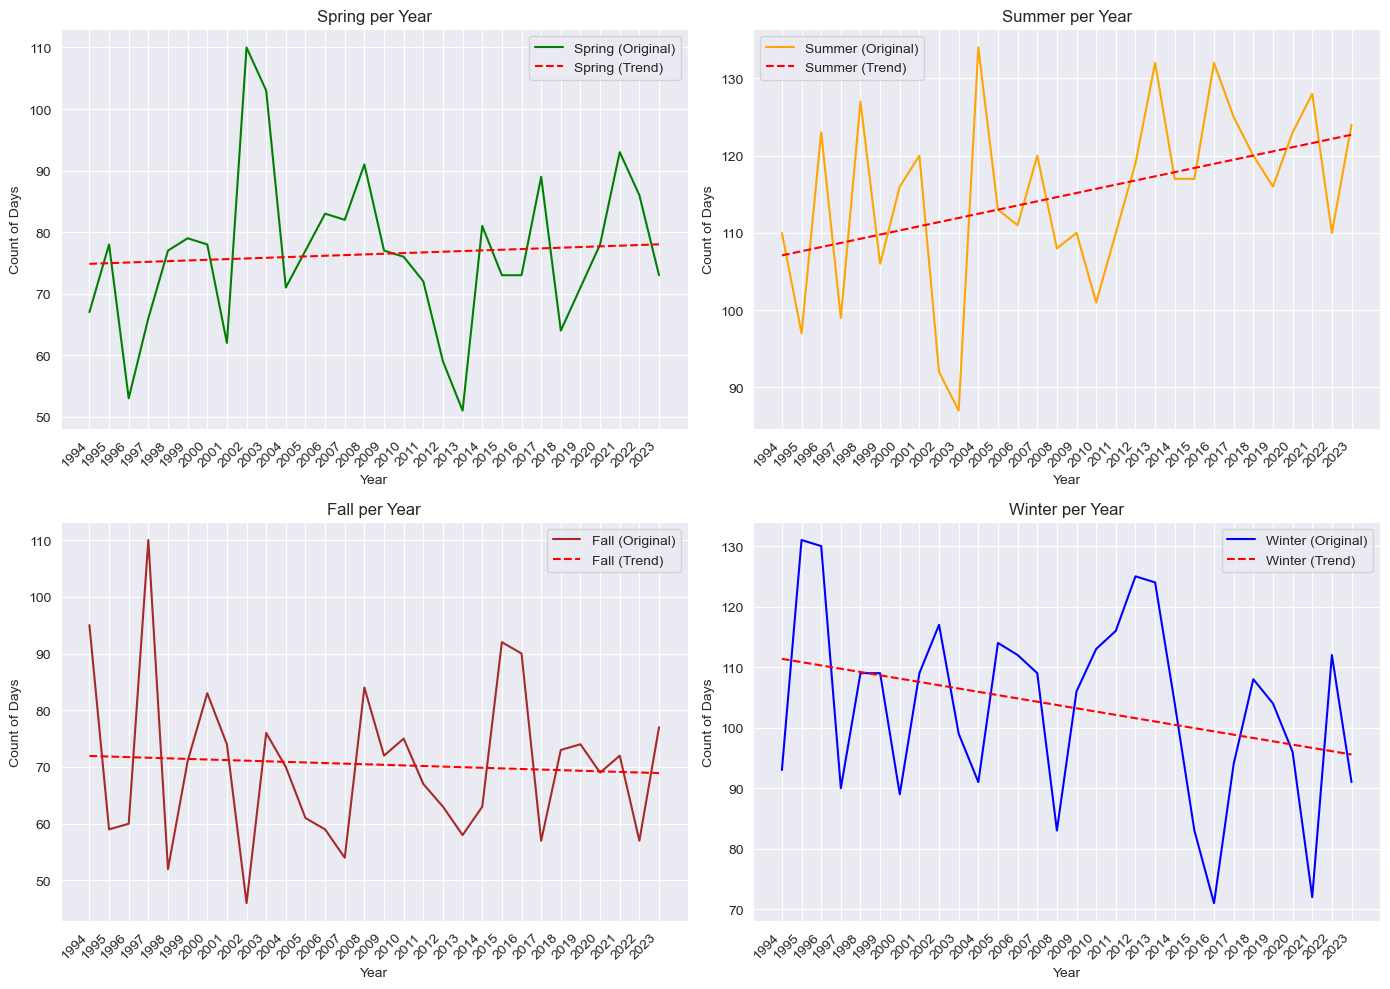

In [197]:
# 원하는 순서대로 계절 정렬
season_order = ['Spring', 'Summer', 'Fall', 'Winter']
year_season_count_reordered = year_season_count[:len(year_season_count)-1].groupby(['year', 'season']).size().unstack(fill_value=0)[season_order]

# 서브플롯 설정 (2x2 그리드)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 계절별 색상 설정
colors = {'Spring': 'green', 'Summer': 'orange', 'Fall': 'brown', 'Winter': 'blue'}

# 계절별 그래프 그리기
for i, season in enumerate(season_order):
    row = i // 2
    col = i % 2
    
    # 연도 및 해당 계절의 데이터
    years = year_season_count_reordered.index
    season_data = year_season_count_reordered[season]
    
    # 원본 데이터 꺾은선 그래프
    axes[row, col].plot(years, season_data, label=f'{season} (Original)', color=colors[season])
    
    # 추세선 계산 (선형 회귀)
    z = np.polyfit(years, season_data, 1)
    p = np.poly1d(z)
    axes[row, col].plot(years, p(years), label=f'{season} (Trend)', linestyle='--', color='red')
    
    # x축에 모든 연도 표시
    axes[row, col].set_xticks(years)
    axes[row, col].set_xticklabels(years, rotation=45, ha='right')  # 연도를 기울여서 표시
    
    # 그래프 설정
    axes[row, col].set_title(f'{season} per Year')
    axes[row, col].set_xlabel('Year')
    axes[row, col].set_ylabel('Count of Days')
    axes[row, col].grid(True)
    axes[row, col].legend()

plt.tight_layout()
# plt.show()
plt.savefig('./figures/seoul_year_season_order.png')